# Análisis de cambio climático

## Introducción

En este documento se analizará el cambio climatico a traves de las variaciones de las temperaturas mundiales desde 1970, ademas se incluiran distintas variables que puedan ser de utilidad para generar un analisis más profundo, de este modo dar un mejor entendiento de los factores que se afectan al calentamiento global.

Los datos son obtenidos a traves de:
- https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv
- https://data.worldbank.org/

Lo siguientes análisis contendrán comentarios de los que se esta realizando para que cualquiera pueda entenderlo.

## Cargando datos

Importamos las librerias a usar en este análisis, las cuales son:
 - Pandas: Ayuda a transformar y tratar los archivos separados por coma (csv) en paneles de datos como tablas de excel
 - Numpy: Libreria que nos permite hacer operaciones matematicas y estaditicas de manera más sencilla
 - Seaborn: Permite generar graficas llamativas con los datos obtenidos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

Usamo la libreria **OS** para cambiar el directorio, de este modo accedemos a la carpeta **data** para cargar los datos

In [2]:
os.chdir('/Users/angel/Desktop/proyectos/c_global/data')
os.getcwd()
print(os.listdir('.'))

['API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', 'API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', 'API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', 'API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', 'GlobalLandTemperaturesByCountry.csv']


Leemos los datos de la temperatura registradas a nivel global

In [3]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


### Descripción del Dataset principal

Aquí podemos ver las dimensiones del dataset:
 - Más de 50.000 filas 
 - 4 columnas
 - Contiene 2 datos tipo "objeto"
 - Contiene 2 datos tipos "float" (número)
 - La media de las temperaturas es de 17.19
 - La mediana de las temperaturas es de 20.09
 - Hay datos de 243 paises
 - Los datos son tomados desde el año 1743 al 2013. Solamente se usaran los datos desde 1970 en adelante


In [4]:
df.shape

(577462, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [7]:
len(df['Country'].unique())

243

In [8]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

Cambiamos el tipo de dato de las fechas con el comando *to_datetime()*, con esto nos aseguramos que se encuentre en el formato correcto. Esto loa añadimos a otra variable que se llamara "year".

In [9]:
df['year']= pd.to_datetime(df['dt'])
df['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [10]:
idx = df['year'] > '1970-01-01'

In [11]:
df = df[idx]
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


#### Agrupación y Agregación
Los datos se agrupan por país con el metodo *groupby*, estos se sub agrupan a traves de las fechas con el metodo *Grouper* que es especial para agrupar por fechas, se le da una frecuencia de agrupación de 1 año con *freq=1*

El metodo *agg* nos sirve para poder agregar nuevas funciones, ya sea a traves de funciones lambdas o a traves de numpy. En este aso se agregro un diccionario con el nombre, calculando con numpy la media y la mediana

In [12]:
df_temp_avg = df.groupby(['Country',
                pd.Grouper(key='year', freq='1Y')
               ]).agg({'AverageTemperature':[np.mean,np.median]})
df_temp_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

Aqui podemos observar un análisis de las temperaturas medias (promedio y mediana) de Chile

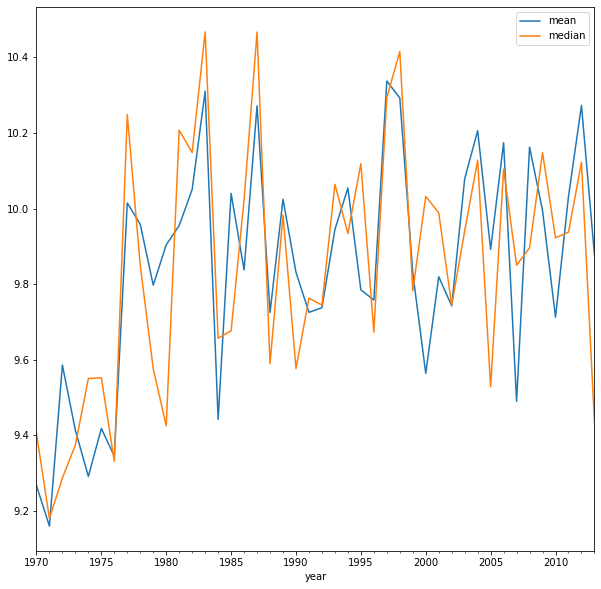

In [38]:
df_temp_avg.xs('Chile')['AverageTemperature'].plot(figsize = (10,10))

### Generando gráficas (Parte 1)

A continuación se presentaran distintas gráficas, alguna de ellas solamente para mostrar el poder del las librerias y otras para comenzar a obtener insight significativos sobre los datos.

Cabe destacar que en esta sección solo se vera el primer dataset y luego se incorporarán los siguientes.

El dataframe se manipulará agregando la media de las temperaturas por año, se resetea el índice y de este modo obtener un dataframe que pueda ser útil

In [15]:
df_temp_med = df_temp_avg['AverageTemperature'][['median']].reset_index()
df_temp_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [16]:
df_temp_med['date'] = df_temp_med['year'].dt.year
df_temp_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [17]:
df_temp_med.rename(columns={'median':'temperature'},inplace=True)
df_temp_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


#### Tablas Dinámicas con Pandas

- Se usan con el metodo *pivot_table*
- Se le ingresan los valores con la variable *values*
- Las filas se ingresan con la variable *index*
- Las columnas se ingresan con la variable *columns*}
- Estas funcionan de la misma forma que las tablas dinámicas de Excel
- Nos permiten generar graficas mejores

In [39]:
df_temp_pivot = df_temp_med.pivot_table(values='temperature',index='date',columns='Country')
df_temp_pivot.head()

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550


Esta grafica de caja solo nos muestra las posibilidades que tiene Pandas para graficar las tablas dinámicas.

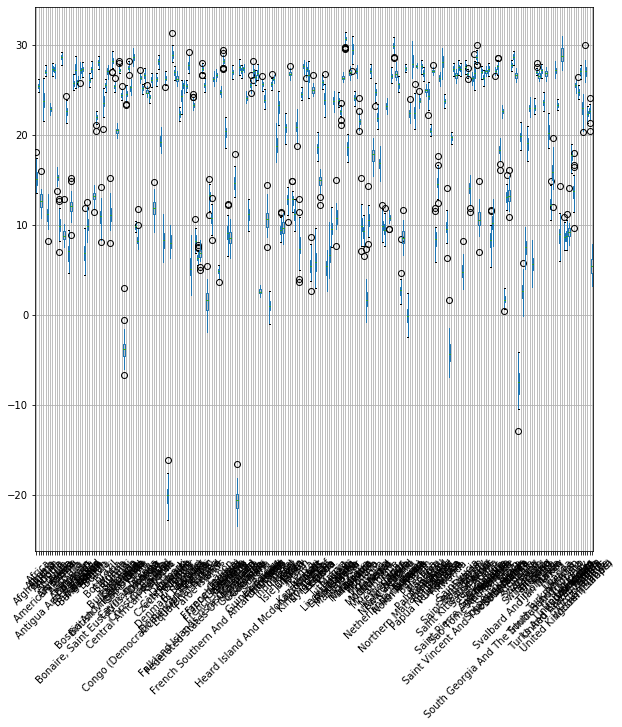

In [35]:
df_temp_pivot.boxplot(figsize=(10,10), rot = 45)

#### Transpuesta

La transpuesta no devuelve una tabla que intercambia las filas por las columnas. En este ejemplo las fechas pasan a estar en las columnas y los paises en las filas. 

Con esto podemos generar una grafica de boxplot que nos de mejores insight

In [46]:
df_temp_pivot.T
df_temp_pivot.T.sample(5)

date,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Ireland,10.825,9.3730,9.1630,8.8560,8.5580,9.3425,8.9720,9.0790,10.2515,8.4620,...,9.2725,9.7825,9.9310,11.3620,8.9670,10.4180,9.8710,11.3120,9.1545,9.0810
Cameroon,24.422,24.0725,24.1850,24.6665,24.0195,24.0085,23.8925,24.3450,24.0850,24.5120,...,24.9685,24.7935,25.0245,24.4755,25.0250,25.0570,25.0005,24.3175,24.4420,25.3965
Malawi,22.289,22.2260,22.3015,22.5360,21.6125,22.1675,22.0550,22.5140,22.6120,22.3975,...,22.7720,23.0725,22.7425,22.7670,22.4865,22.8385,23.4755,22.7400,22.7355,21.1260
Luxembourg,10.068,9.9530,8.2860,7.5800,7.9335,8.0995,9.6230,9.4165,8.7595,9.2315,...,10.6045,11.6860,11.1640,11.4020,8.9470,10.9890,9.6295,11.9400,9.2890,10.1490
France,13.280,13.6255,12.2220,11.5675,11.1045,12.0740,12.6570,12.7055,12.1130,12.7975,...,13.8065,14.5520,14.5185,14.5270,12.8220,13.9020,13.5365,15.0750,13.2780,13.0415


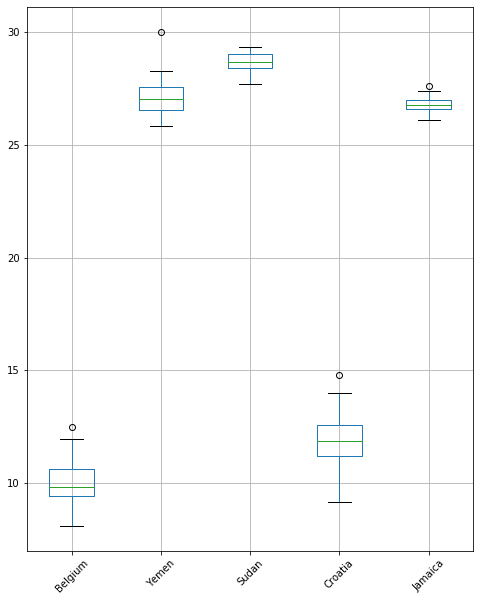

In [49]:
# Tomamos una muestra aleatoria de los paises con el metodo sample, esto son graficados

df_temp_pivot.T.sample(5).T.boxplot(figsize=(8,10), rot=45)

## Unión de los otros dataset al Dataframe

Se agregan los siguientes dataset a los cuales se les quita las dos primeras filas que solo traen información de como se obtuvieron los datos:

- df_agri: Evolución de la agricultura en los paises a traves de los años
- df_fore: Datos sobre deforestación por pais a traves de los años
- df_elec: Cantidad de producción electrica por pais a traves de los años
- df_co2e: Cantidad de CO2 emitido por país a traves de los años
- df_popu: Cantidad de población por país a traves de los años 

Estos dataframes serán modificados, con funciones de python, para poder unirlas al Dataframe consolidado, para ello usaremos el metodo *merge* de Pandas.

In [23]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header = 2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header = 2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header = 2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header = 2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header = 2)

In [24]:
df_popu.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,0.0,0.0
mean,1.180664e+08,1.196487e+08,1.217640e+08,1.243969e+08,1.270502e+08,1.297689e+08,1.326321e+08,1.354859e+08,1.383920e+08,1.414415e+08,...,2.806647e+08,2.852876e+08,2.889023e+08,2.925508e+08,2.962148e+08,2.999114e+08,3.035995e+08,3.072302e+08,NaN,NaN
std,3.730942e+08,3.775621e+08,3.841278e+08,3.926847e+08,4.012844e+08,4.101198e+08,4.195221e+08,4.288621e+08,4.384146e+08,4.484547e+08,...,8.924886e+08,9.047110e+08,9.155191e+08,9.264022e+08,9.373108e+08,9.483019e+08,9.592829e+08,9.700134e+08,NaN,NaN
min,3.893000e+03,3.989000e+03,4.076000e+03,4.183000e+03,4.308000e+03,4.468000e+03,4.685000e+03,4.920000e+03,5.193000e+03,5.459000e+03,...,1.005700e+04,1.027900e+04,1.082100e+04,1.097200e+04,1.109900e+04,1.122500e+04,1.137000e+04,1.150800e+04,NaN,NaN
25%,5.022908e+05,5.109635e+05,5.206552e+05,5.311588e+05,5.421285e+05,5.533358e+05,5.647510e+05,5.823600e+05,5.981080e+05,6.100040e+05,...,1.449584e+06,1.409858e+06,1.427339e+06,1.444866e+06,1.463189e+06,1.514952e+06,1.577592e+06,1.638404e+06,NaN,NaN
50%,3.658470e+06,3.738358e+06,3.821016e+06,3.926268e+06,4.051891e+06,4.180652e+06,4.275565e+06,4.344568e+06,4.415026e+06,4.455048e+06,...,9.460830e+06,9.624311e+06,9.746730e+06,9.855382e+06,1.000153e+07,1.012427e+07,1.017900e+07,1.023247e+07,NaN,NaN
75%,2.532671e+07,2.611452e+07,2.690411e+07,2.766416e+07,2.839934e+07,2.913676e+07,2.988608e+07,3.059503e+07,3.120239e+07,3.179527e+07,...,5.149739e+07,5.247893e+07,5.323004e+07,5.397970e+07,5.470996e+07,5.541544e+07,5.641631e+07,5.741430e+07,NaN,NaN
max,3.032020e+09,3.073078e+09,3.126066e+09,3.191186e+09,3.256700e+09,3.323624e+09,3.393699e+09,3.463147e+09,3.533537e+09,3.608236e+09,...,7.004011e+09,7.086994e+09,7.170962e+09,7.255654e+09,7.340548e+09,7.426103e+09,7.510990e+09,7.594270e+09,NaN,NaN


In [25]:
range(1971,2015)
map(str,range(1971,2015))
list(map(str,range(1971,2015)))

['1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [26]:
cols = ['Country Name','Country Code'] + list(map(str,range(1971,2015)))
cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [27]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Afghanistan,AFG,1971,380360.0
2,Angola,AGO,1971,574000.0
3,Albania,ALB,1971,12000.0
4,Andorra,AND,1971,250.0
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.0
11613,South Africa,ZAF,2014,968410.0
11614,Zambia,ZMB,2014,238360.0


In [28]:
def fun_format(df,col='agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':col})

In [29]:
df_agri = fun_format(df_agri,col='agriculture')
df_fore = fun_format(df_fore,col='forestal')
df_elec = fun_format(df_elec,col='electricprod')
df_co2e = fun_format(df_co2e,col='co2')
df_popu = fun_format(df_popu,col='population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.0
1,Afghanistan,AFG,1971,11475445.0
2,Angola,AGO,1971,6040777.0
3,Albania,ALB,1971,2187853.0
4,Andorra,AND,1971,25559.0
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.0
11612,"Yemen, Rep.",YEM,2014,25823485.0
11613,South Africa,ZAF,2014,54545991.0
11614,Zambia,ZMB,2014,15399753.0


In [30]:
df_temp_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [31]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  object 
 3   population  11501 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.1+ KB


In [50]:
df_temp_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      10692 non-null  object        
 1   year         10692 non-null  datetime64[ns]
 2   temperature  10648 non-null  float64       
 3   date         10692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 334.2+ KB


In [51]:
df_popu['date'] = df_popu['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)

In [53]:
df_merge = pd.merge(df_temp_med[['Country','temperature','date']],
                    df_popu, on = ['Country', 'date'],how = 'inner')

In [54]:
df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country','name', 'date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country','name', 'date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country','name', 'date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name', 'date'],
                    how = 'inner')

df_merge

,Country,temperature,date,name,population,forestal,electricprod,co2,agriculture
0,Afghanistan,14.9340,1971,AFG,11475445.0,NaN,NaN,1895.839,380360.0
1,Afghanistan,13.8725,1972,AFG,11791215.0,NaN,NaN,1532.806,380460.0
2,Afghanistan,14.9130,1973,AFG,12108963.0,NaN,NaN,1639.149,380480.0
3,Afghanistan,13.6160,1974,AFG,12412950.0,NaN,NaN,1917.841,380480.0
4,Afghanistan,13.5130,1975,AFG,12689160.0,NaN,NaN,2126.860,380480.0
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526968.0,159510.000000,585.456912,5603.176,163000.0
7220,Zimbabwe,23.3040,2010,ZWE,12697723.0,156240.000000,606.644199,7777.707,162000.0
7221,Zimbabwe,22.9420,2011,ZWE,12894316.0,153115.996094,636.249337,9563.536,164000.0
7222,Zimbabwe,23.0455,2012,ZWE,13115131.0,149992.001953,608.762505,7792.375,162000.0


In [55]:
df_climate = df_merge.dropna()

In [57]:
pd.set_option('display.float_format','{:,.1f}'.format)

In [58]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [62]:
first_10_total = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10)
first_10_total


Country
North America    5,886,299.6
United States    5,382,123.7
China            3,668,917.8
Japan            1,202,082.9
India            1,047,705.9
Germany            822,812.5
United Kingdom     538,678.6
Canada             518,396.5
Italy              430,485.6
Mexico             413,683.4
Name: co2, dtype: float64

In [63]:
first_10_index = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10_index

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [65]:
df_max_co2=df_climate[df_climate['Country'].isin(first_10_index)]
df_max_co2

,Country,temperature,date,name,population,forestal,electricprod,co2,agriculture
1266,Canada,-4.6,1990,CAN,"27,691,138.0","3,482,730.0","16,167.4","435,181.2","677,680.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","3,482,259.1","16,181.6","426,780.1","677,530.0"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","3,481,788.1","16,164.4","440,978.8","678,140.0"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","3,481,316.9","16,320.1","445,580.8","678,740.0"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","3,480,845.9","16,388.3","456,849.5","679,340.0"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","3,079,274.1","12,913.7","5,263,505.5","4,099,606.9"
7005,United States,10.2,2010,USA,"309,326,085.0","3,087,200.0","13,394.9","5,395,532.1","4,084,261.9"
7006,United States,9.5,2011,USA,"311,580,009.0","3,089,950.0","13,246.0","5,289,680.5","4,046,693.1"
7007,United States,9.9,2012,USA,"313,874,218.0","3,092,700.0","12,964.3","5,119,436.4","4,087,065.0"


In [94]:
df_topten = df_max_co2.groupby('Country').mean()

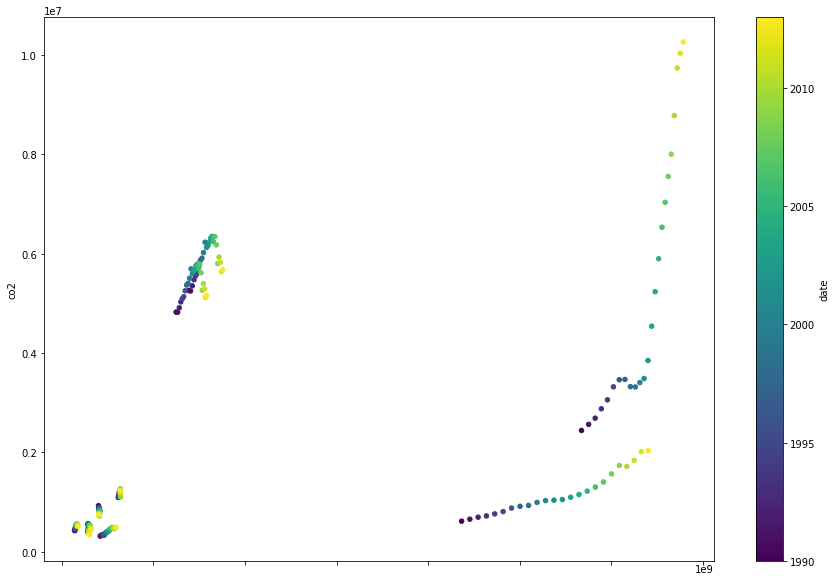

In [66]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap = 'viridis',
    figsize=(15,10)
)

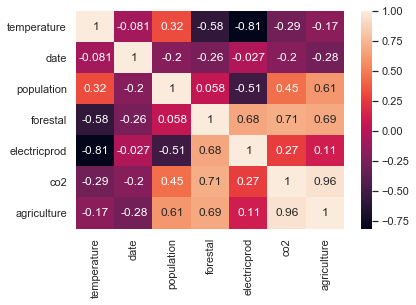

In [96]:
sns.heatmap(df_topten.reset_index().corr(),annot=True)

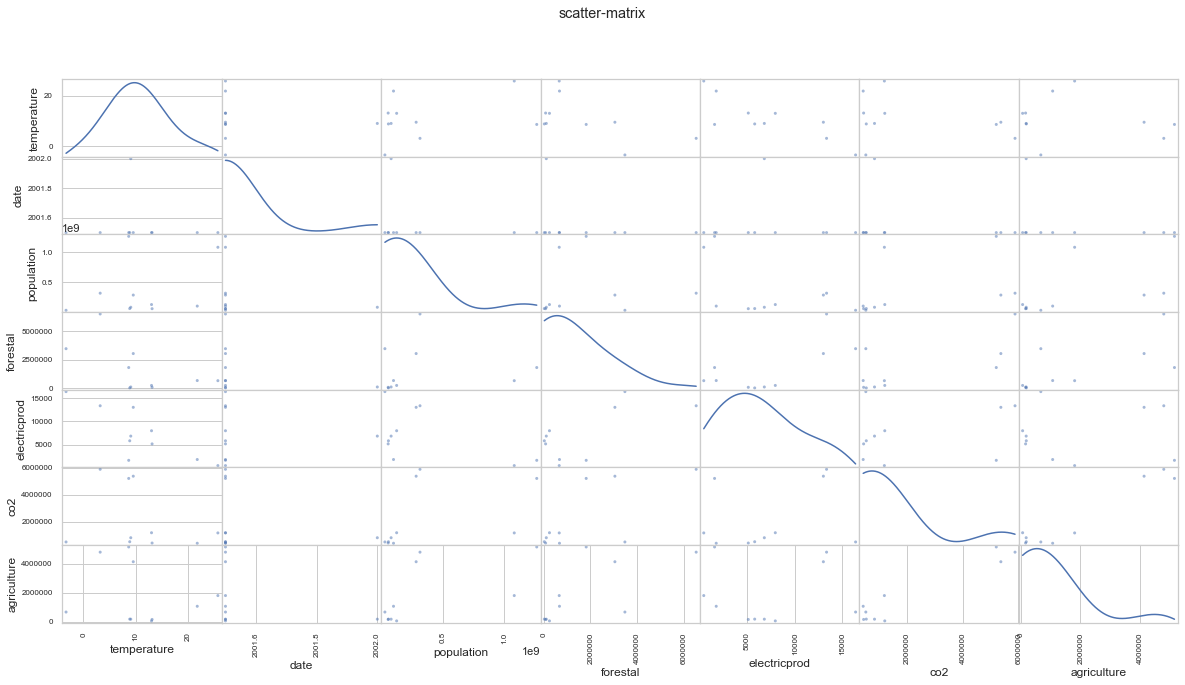

In [99]:
scatter_matrix(df_topten.reset_index(),diagonal='kde', figsize=(20,10)) 
plt.suptitle('scatter-matrix')

plt.show()

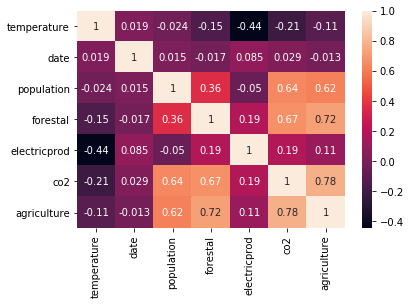

In [67]:
sns.heatmap(df_climate.corr(),annot = True)

In [68]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,population,forestal,electricprod,co2,agriculture
date,,,,,,
1990,22.7,"10,213,863.0","54,005.0","1,114.7","31,363.9","90,195.0"
1991,22.4,"10,346,663.5","60,307.5","1,072.5","27,343.0","91,870.0"
1992,19.9,"9,188,305.5","45,621.0","1,451.8","26,420.7","89,700.0"
1993,20.6,"9,951,683.5","44,579.0","1,520.3","28,267.1","89,890.0"
1994,20.7,"9,991,525.0","42,572.0","1,576.8","29,640.4","89,150.0"
1995,20.1,"10,026,176.0","41,640.0","1,578.3","29,090.3","81,080.0"
1996,20.2,"10,063,945.0","41,270.0","1,687.1","30,670.8","79,870.0"
1997,20.4,"10,108,977.0","41,270.0","1,762.4","30,623.1","80,120.0"
1998,21.5,"10,069,000.0","40,834.0","1,807.3","31,675.5","80,550.0"


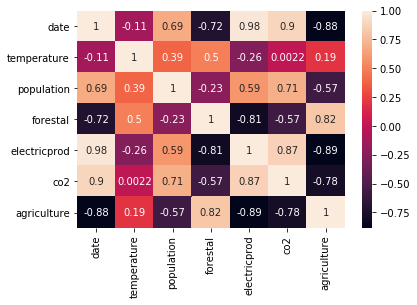

In [69]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [70]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

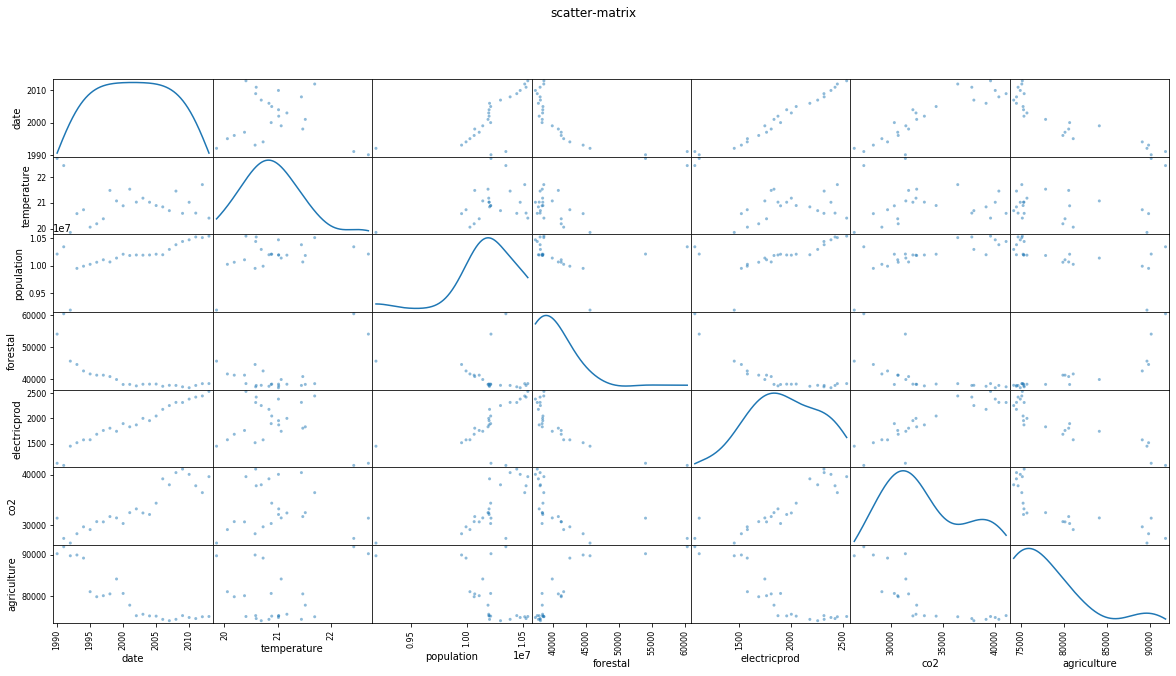

In [71]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize=(20,10)) 
plt.suptitle('scatter-matrix')

plt.show()

In [72]:
from pandas.plotting import parallel_coordinates

In [73]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia',
              'Argentina',
              'Bolivia',
              'Mexico',
              'Peru',
              'Chile'])
][['Country',
'temperature',
'co2',
'agriculture',
'forestal']]

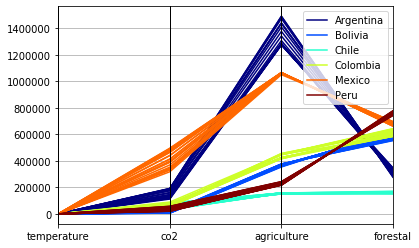

In [74]:
parallel_coordinates(df_samerica,'Country', colormap='jet')

In [77]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2735 entries, 62 to 7223
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       2735 non-null   object 
 1   temperature   2735 non-null   float64
 2   date          2735 non-null   int64  
 3   name          2735 non-null   object 
 4   population    2735 non-null   float64
 5   forestal      2735 non-null   float64
 6   electricprod  2735 non-null   float64
 7   co2           2735 non-null   float64
 8   agriculture   2735 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 213.7+ KB


In [84]:
df_climate.groupby(['Country']).median()

,temperature,date,population,forestal,electricprod,co2,agriculture
Country,,,,,,,
Albania,13.3,"2,001.5","3,055,591.5","7,773.4","1,383.0","3,912.7","11,330.0"
Algeria,24.4,"2,001.5","31,653,311.5","16,274.0",720.0,"93,669.8","399,633.5"
Angola,22.9,"2,001.5","17,232,585.0","595,408.0",84.3,"10,716.8","575,000.0"
Argentina,15.4,"2,001.5","37,478,700.5","313,578.0","2,104.7","140,976.0","1,286,580.0"
Armenia,10.2,"2,002.5","3,025,955.0","3,325.0","1,474.7","3,593.7","14,175.0"
...,...,...,...,...,...,...,...
Uruguay,18.0,"2,001.5","3,321,639.5","14,153.3","1,964.6","5,583.0","149,220.0"
Uzbekistan,13.9,"2,002.5","25,419,750.0","32,436.7","1,765.0","116,740.8","269,430.0"
Vietnam,24.9,"2,001.5","81,138,453.0","121,320.0",352.0,"65,973.0","94,690.0"


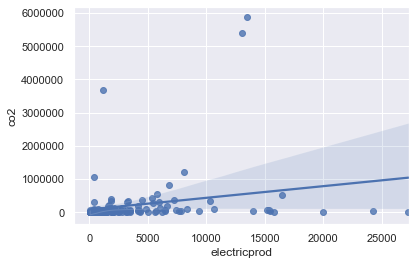

In [87]:
sns.set(color_codes=True)
sns.regplot(x="electricprod", y="co2", data=df_climate.groupby(['Country']).median());

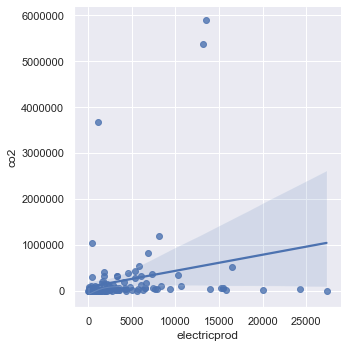

In [88]:
sns.lmplot(x="electricprod", y="co2", data=df_climate.groupby(['Country']).median());